In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('unclean focus.csv')
df

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,Focus,2016.0,"£8,000",Manual,NaN,Petrol,0.999,"38,852",NaN,NaN,/ad/25451236
1,Focus,2019.0,"£13,400",Manual,NaN,Petrol,0.999,"11,952",NaN,NaN,/ad/25466927
2,Focus,2019.0,"£14,600",Manual,NaN,Petrol,1.498,"22,142",NaN,NaN,/ad/25484363
3,Focus,2016.0,"£9,450",Manual,NaN,Diesel,1.56,"14,549",NaN,NaN,/ad/20444868
4,Focus,2015.0,"£9,999",Manual,NaN,Diesel,1.56,"7,010",NaN,NaN,/ad/22551057
...,...,...,...,...,...,...,...,...,...,...,...
5599,Focus,2019.0,"£18,745",Manual,NaN,Diesel,2,"7,855",NaN,NaN,/ad/25149519
5600,Focus,2019.0,"£16,350",Manual,NaN,Petrol,1,"13,891",NaN,NaN,/ad/25149523
5601,Focus,2019.0,"£16,850",Manual,NaN,Petrol,1,"13,452",NaN,NaN,/ad/25149532
5602,Focus,2019.0,"£17,310",Automatic,NaN,Petrol,1,"13,376",NaN,NaN,/ad/25149535


In [3]:
df.dtypes

model            object
year            float64
price            object
transmission     object
mileage          object
fuel type        object
engine size      object
mileage2         object
fuel type2       object
engine size2     object
reference        object
dtype: object

In [4]:
df['model'].unique()

array([' Focus', nan], dtype=object)

In [5]:
df.isnull().sum()/df.shape[0]*100


model            0.999286
year             2.587438
price            0.999286
transmission     0.999286
mileage         15.613847
fuel type       60.956460
engine size      1.802284
mileage2         1.695218
fuel type2      15.613847
engine size2    15.613847
reference        0.999286
dtype: float64

In [6]:
df['model'].replace(np.nan,' Focus',inplace=True)

In [7]:
df['year'].value_counts()

2019.0    1594
2017.0    1288
2018.0    1066
2016.0     553
2015.0     393
2014.0     156
2013.0     152
2020.0      66
2012.0      42
2009.0      37
2011.0      32
2008.0      26
2010.0      20
2007.0      15
2005.0      11
2003.0       4
2006.0       3
2002.0       1
Name: year, dtype: int64

<Axes: >

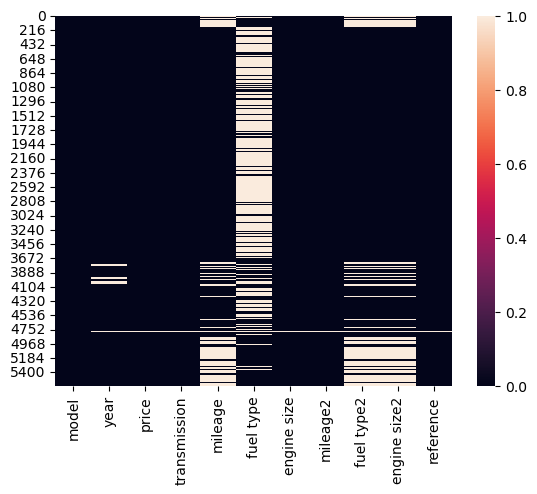

In [8]:
sb.heatmap(df.isnull())

In [9]:
a=df['year'].mean()
a

2017.1060633815716

In [10]:
df['year'].fillna(a,inplace=True)

In [11]:
df['price'].value_counts()

 £11,000    74
 £16,000    67
 £13,000    51
 £12,000    50
 £18,500    47
            ..
 £9,940      1
 £6,591      1
 £18,090     1
 £9,677      1
 £17,799     1
Name: price, Length: 1768, dtype: int64

In [12]:
df['price'] = df['price'].str.replace('\D', '', regex=True)

In [13]:
df['price']=df['price'].astype('float')

In [14]:
df.dtypes

model            object
year            float64
price           float64
transmission     object
mileage          object
fuel type        object
engine size      object
mileage2         object
fuel type2       object
engine size2     object
reference        object
dtype: object

<Axes: >

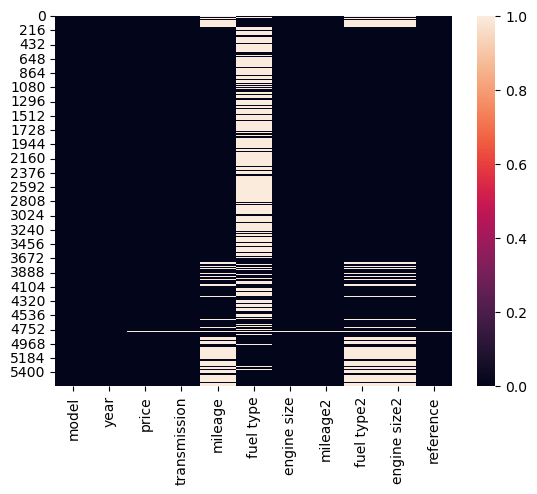

In [15]:
sb.heatmap(df.isnull())

In [16]:
b=df['price'].mean()
b

13591.382480173035

In [17]:
df['price'].fillna(b,inplace=True)

<Axes: >

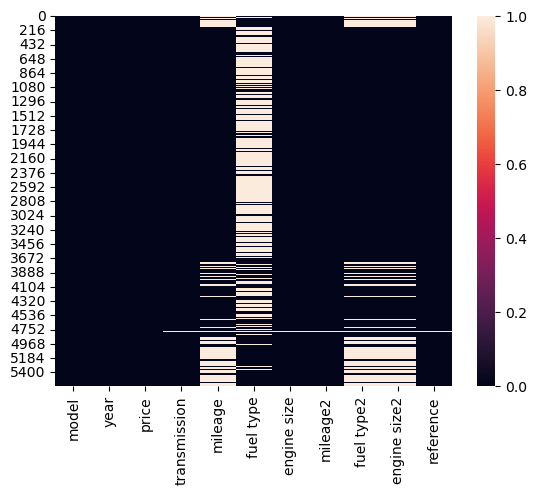

In [18]:
sb.heatmap(df.isnull())

In [19]:
df.dtypes

model            object
year            float64
price           float64
transmission     object
mileage          object
fuel type        object
engine size      object
mileage2         object
fuel type2       object
engine size2     object
reference        object
dtype: object

In [20]:
df['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto', nan], dtype=object)

In [21]:
df['transmission'].value_counts()

Manual       4756
Automatic     637
Semi-Auto     155
Name: transmission, dtype: int64

In [22]:
df['transmission'].fillna('Manual',inplace=True)

In [23]:
df['mileage'].unique()

array([nan, '13,255', '42,112', ..., '21,215', '1,478', '9,137'],
      dtype=object)

In [24]:
df['mileage']=df['mileage'].str.replace('\D', '', regex=True)

In [25]:
df['mileage']=df['mileage'].str.replace(',', '', regex=True)

In [26]:
# df['mileage']=df['mileage'].astype('float')
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

In [27]:
t=df['mileage'].mean()
t

24017.563028764805

In [28]:
df['mileage'].fillna(t,inplace=True)

<Axes: >

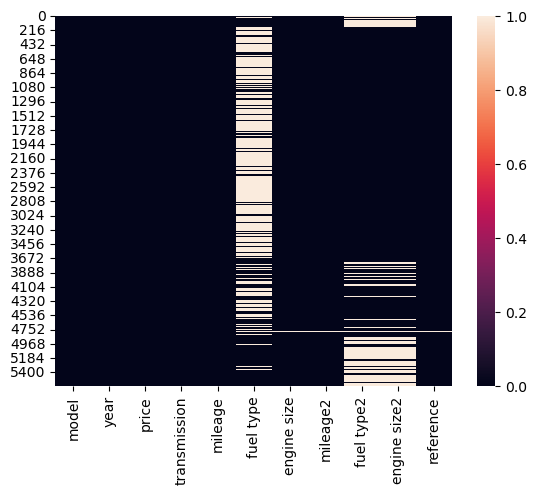

In [29]:
sb.heatmap(df.isnull())

In [30]:
df.isnull().sum()/df.shape[0]*100

model            0.000000
year             0.000000
price            0.000000
transmission     0.000000
mileage          0.000000
fuel type       60.956460
engine size      1.802284
mileage2         1.695218
fuel type2      15.613847
engine size2    15.613847
reference        0.999286
dtype: float64

In [31]:
df['fuel type'].value_counts()

Petrol    539
14        425
Diesel    280
11        197
15        153
26        140
24         86
16         79
12         69
36         53
10         44
13         24
22         23
33         16
40         11
35          9
21          7
18          6
19          5
9           4
34          4
17          4
8           2
20          2
25          2
7           1
31          1
38          1
6           1
Name: fuel type, dtype: int64

In [32]:
df['fuel type'].replace(np.nan,'Diesel',inplace=True)

In [33]:
df.dtypes

model            object
year            float64
price           float64
transmission     object
mileage         float64
fuel type        object
engine size      object
mileage2         object
fuel type2       object
engine size2     object
reference        object
dtype: object

In [34]:
df['engine size'].value_counts()

£145        2582
£20          693
£0           511
1            418
£150         388
1.5          213
£125         117
2            116
£200         101
£30           93
£160          46
£235          37
2.3           37
£145          28
£205          26
£165          21
1499           9
£260           8
£240           7
1560           5
£265           5
£150           5
1.6            4
999            4
£325           4
£140           3
1999           2
£330           2
£195           2
0.999          2
1596           2
1.56           2
£300           1
£120           1
1.498          1
1498           1
2300           1
£190           1
1000           1
£155           1
£230           1
 2,00 cc       1
Name: engine size, dtype: int64

In [35]:
df['engine size']=df['engine size'].str.replace('\D', '', regex=True)

In [36]:
df['engine size']=df['engine size'].astype('float')

In [37]:
q=df['engine size'].mean()
q

103.32872978375431

In [38]:
df['engine size'].fillna(q,inplace=True)

<Axes: >

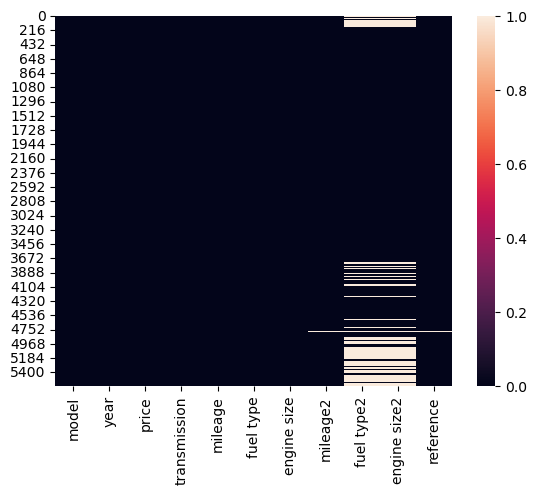

In [39]:
sb.heatmap(df.isnull())

In [40]:
df['mileage2'].unique()

array(['38,852', '11,952', '22,142', '14,549', '7,010', '26,796',
       '16,128', '4,900', '30,953', '3,000', '57.7', '61.4', '74.3',
       '44.8', '80.7', '60.1', '67.3', '51.4', '8,879', '4,698', '16,199',
       '3,212', '8,201', '13,471', '12,372', '11,535', '2,219', '10,230',
       '201', '48,961', '13,516', '23,500', '12,395', '4,984', '6,393',
       '12,198', '50.4', '46.3', '9,439', '9,943', '8,188', '10,589',
       '15,272', '13,789', '3,655', '7,555', '13,737', '13,706', '7,426',
       '11,594', '12,119', '13,762', '12,811', '13,797', '11,645',
       '13,545', '6,428', '10,370', '53,130', '29,705', '5,367', '4,855',
       '100', '9,022', '19,785', '57,029', '64.2', '42.2', '65,000',
       '41,495', '11,382', '25,519', '17,339', '8,566', '7,846', '4,711',
       '12,877', '7,021', '13,752', '10,805', '11,883', '11,536',
       '12,677', '12,062', '11,834', '974', '2,950', '3,796', '3,230',
       '13,240', '14,410', '10,503', '12,624', '9,675', '7,590', '7,358',
     

In [41]:
# df['mileage2']=df['mileage2'].astype('float')
df['mileage2'] = pd.to_numeric(df['mileage2'], errors='coerce')

In [42]:
df['mileage2']=df['mileage2'].astype('float')

In [43]:
df.dtypes

model            object
year            float64
price           float64
transmission     object
mileage         float64
fuel type        object
engine size     float64
mileage2        float64
fuel type2       object
engine size2     object
reference        object
dtype: object

<Axes: >

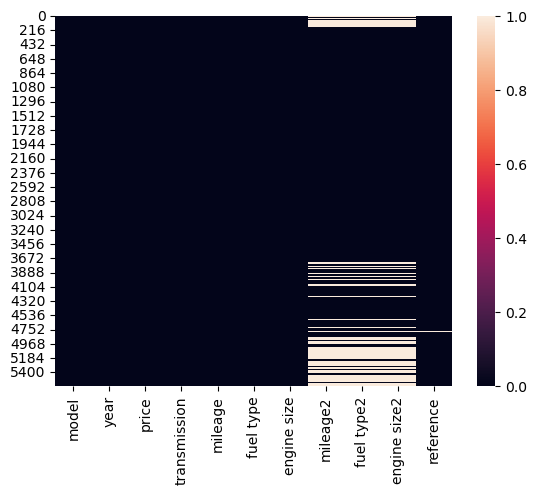

In [44]:
sb.heatmap(df.isnull())

In [45]:
q2=df['mileage2'].mean()
q2

63.10897354497355

In [46]:
df['mileage2'].fillna(q2,inplace=True)

In [47]:
df['fuel type2'].unique()

array([nan, 'Petrol', 'Diesel', 'Other'], dtype=object)

In [48]:
df['fuel type2'].value_counts()

Petrol    3067
Diesel    1661
Other        1
Name: fuel type2, dtype: int64

In [49]:
df['fuel type2'].fillna('Petrol',inplace=True)

In [50]:
df['engine size2'].unique()

array([nan, '0.999', '1.499', '1.596', '1.997', '1', '1000', '1500',
       '1.498', '2', '1.6', '1.5', '1.56', '1.8', '1600', '1999', '2.3',
       '1596', '1798', '999', '1560', '1498', '998', '1997', '1499',
       '1560 cc', '2000', '1988', '2521', '2261', '0', '2300', '0.998',
       '1496', '1753', '1989', '2.5', '1596 cc', '2.29', 'Unknown',
       '2.521', '1388', '1.0T'], dtype=object)

In [51]:
df['engine size2']=df['engine size2'].str.replace('\D', '', regex=True)

In [52]:
df['engine size2'] = pd.to_numeric(df['engine size2'], errors='coerce')

In [53]:
df['engine size2'] =df['engine size2'].astype('float') 

<Axes: >

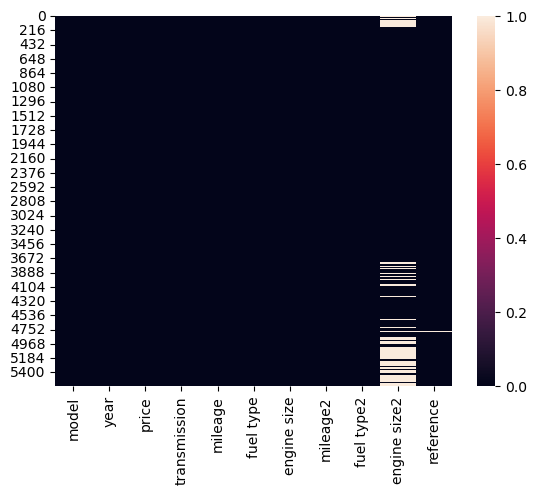

In [54]:
sb.heatmap(df.isnull())

In [55]:
at=df['engine size2'].mean()
at

196.22205757832344

In [56]:
df.dtypes

model            object
year            float64
price           float64
transmission     object
mileage         float64
fuel type        object
engine size     float64
mileage2        float64
fuel type2       object
engine size2    float64
reference        object
dtype: object

In [57]:
df['engine size2'].fillna(at,inplace=True)

<Axes: >

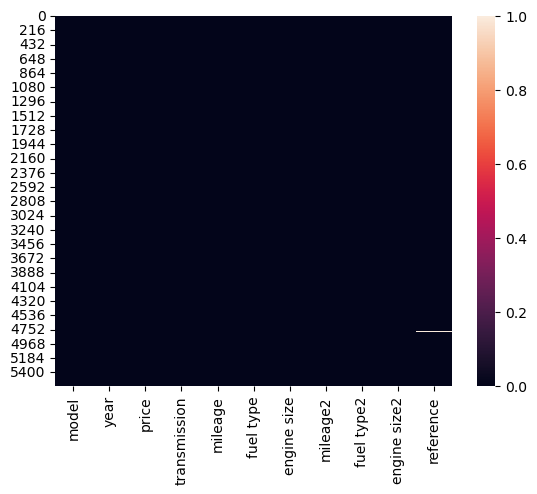

In [58]:
sb.heatmap(df.isnull())

In [59]:
df.drop(['reference'], axis=1,inplace=True)

In [60]:
df

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2
0,Focus,2016.0,8000.0,Manual,24017.563029,Petrol,999.0,63.108974,Petrol,196.222058
1,Focus,2019.0,13400.0,Manual,24017.563029,Petrol,999.0,63.108974,Petrol,196.222058
2,Focus,2019.0,14600.0,Manual,24017.563029,Petrol,1498.0,63.108974,Petrol,196.222058
3,Focus,2016.0,9450.0,Manual,24017.563029,Diesel,156.0,63.108974,Petrol,196.222058
4,Focus,2015.0,9999.0,Manual,24017.563029,Diesel,156.0,63.108974,Petrol,196.222058
...,...,...,...,...,...,...,...,...,...,...
5599,Focus,2019.0,18745.0,Manual,24017.563029,Diesel,2.0,63.108974,Petrol,196.222058
5600,Focus,2019.0,16350.0,Manual,24017.563029,Petrol,1.0,63.108974,Petrol,196.222058
5601,Focus,2019.0,16850.0,Manual,24017.563029,Petrol,1.0,63.108974,Petrol,196.222058
5602,Focus,2019.0,17310.0,Automatic,24017.563029,Petrol,1.0,63.108974,Petrol,196.222058


<Axes: >

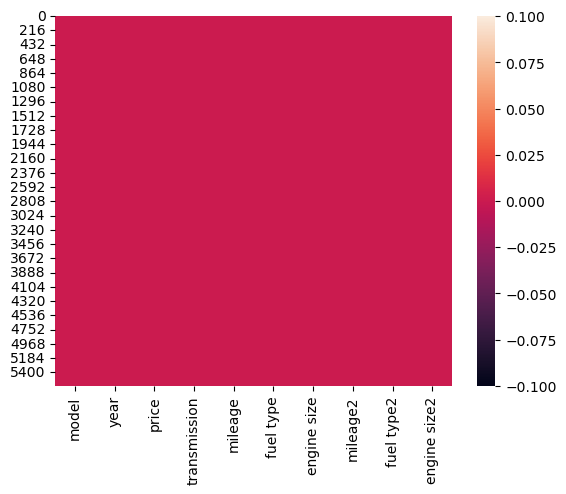

In [61]:
sb.heatmap(df.isnull())

<Axes: >

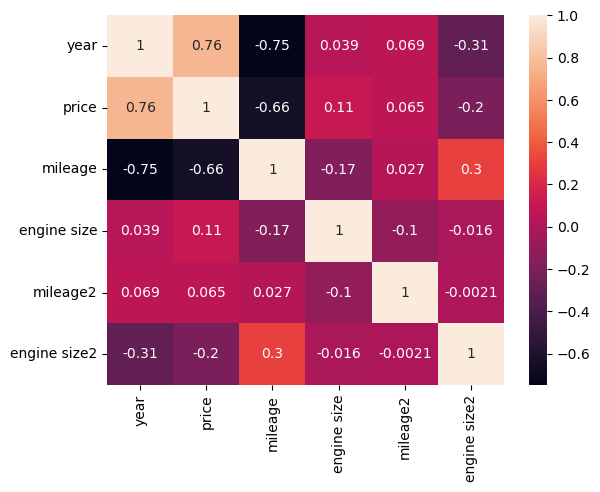

In [62]:
sb.heatmap(df.corr(),annot=True)

In [64]:
df_obj=df.select_dtypes(['object'])
df_obj.dtypes

model           object
transmission    object
fuel type       object
fuel type2      object
dtype: object

In [66]:
df_num=df.select_dtypes(['float64','int64'])
df_num.dtypes

year            float64
price           float64
mileage         float64
engine size     float64
mileage2        float64
engine size2    float64
dtype: object

In [67]:
from sklearn.preprocessing import LabelEncoder

#create an object for labelencoder
le=LabelEncoder()
df_obj.columns
for col in df_obj:
    df_obj[col]=le.fit_transform(df_obj[col])          

In [68]:
df_obj.head()

,model,transmission,fuel type,fuel type2
0,0,1,28,2
1,0,1,28,2
2,0,1,28,2
3,0,1,27,2
4,0,1,27,2


In [69]:
df_new=pd.concat([df_num,df_obj],axis=1)
df_new

,year,price,mileage,engine size,mileage2,engine size2,model,transmission,fuel type,fuel type2
0,2016.0,8000.0,24017.563029,999.0,63.108974,196.222058,0,1,28,2
1,2019.0,13400.0,24017.563029,999.0,63.108974,196.222058,0,1,28,2
2,2019.0,14600.0,24017.563029,1498.0,63.108974,196.222058,0,1,28,2
3,2016.0,9450.0,24017.563029,156.0,63.108974,196.222058,0,1,27,2
4,2015.0,9999.0,24017.563029,156.0,63.108974,196.222058,0,1,27,2
...,...,...,...,...,...,...,...,...,...,...
5599,2019.0,18745.0,24017.563029,2.0,63.108974,196.222058,0,1,27,2
5600,2019.0,16350.0,24017.563029,1.0,63.108974,196.222058,0,1,28,2
5601,2019.0,16850.0,24017.563029,1.0,63.108974,196.222058,0,1,28,2
5602,2019.0,17310.0,24017.563029,1.0,63.108974,196.222058,0,0,28,2
